<a href="https://colab.research.google.com/github/glcn35/ML11/blob/main/soldier_race_project_D1178_g%C3%BClcan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.4f}')
# pd.set_option('display.float_format', lambda x: '%.6f'%x)
# pd.options.display.float_format = '{:.3f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [2]:
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score
import pickle

In [5]:
# yellowbrick library for visualizing the model performance
from yellowbrick.cluster import KElbowVisualizer 

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

In [4]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})

params = {
'figure.figsize':(8,4),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [6]:
df_m = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='unicode_escape')
df_male = df_m.copy()
df_male.head(2)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand


In [7]:
df_f = pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')
df_female = df_f.copy()
df_female.head(2)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand


In [8]:
df_female.shape, df_male.shape

((1986, 108), (4082, 108))

In [9]:
df_female.columns, df_male.columns

(Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
        'acromionradialelength', 'anklecircumference', 'axillaheight',
        'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
        'bicepscircumferenceflexed',
        ...
        'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
        'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
        'WritingPreference'],
       dtype='object', length=108),
 Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
        'acromionradialelength', 'anklecircumference', 'axillaheight',
        'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
        'bicepscircumferenceflexed',
        ...
        'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
        'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
        'WritingPreference'],
       dtype='object', length=108))

## Explore Data

### If needed, rename the columns' names for easy use. 

In [27]:
(df_female.columns!=df_male.columns).sum()

0

In [28]:
df_female.rename(columns={'SubjectId':'subjectid'}, inplace=True)

In [29]:
df = pd.concat([df_female,df_male], ignore_index=True)
df.sample(3)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
2330,11738,250,1453,343,220,1334,273,199,425,365,276,535,78,345,327,142,1066,261,928,621,502,393,1528,302,1131,258,1330,862,663,392,45,75,25,234,805,112,264,357,307,600,476,1165,90,212,190,163,588,207,347,67,367,402,1068,625,442,454,497,566,494,78,417,121,396,436,1402,118,434,263,1225,371,158,920,904,603,1815,1769,1458,1130,625,191,828,483,130,949,1656,462,343,958,224,384,1084,873,171,858,Male,2-Nov-10,Fort Hood,Regular Army,Combat Service Support,74D,New York,3,Honduran Nicaraguan,3,39,70,189,Right hand
3136,14667,245,1457,325,227,1343,247,197,402,387,274,505,77,325,323,137,987,232,885,625,506,396,1541,295,1065,254,1273,854,563,333,31,65,23,262,810,100,267,346,315,595,478,1136,87,212,186,150,553,199,343,74,346,369,1075,645,463,474,478,549,485,70,417,127,394,420,1435,116,426,263,1180,357,153,918,894,573,1792,1769,1466,1108,604,169,816,467,129,894,1697,509,313,902,235,413,1054,828,178,877,Male,9-Mar-11,Camp Atterbury,Army Reserve,Combat Service Support,31B,Arkansas,1,NaN,1,34,70,185,Right hand
1092,25092,211,1243,290,213,1144,212,161,339,287,247,407,63,297,278,128,985,214,767,539,441,358,1317,241,852,219,1095,711,615,313,32,55,17,234,717,87,217,283,251,423,393,967,78,184,157,138,533,185,295,63,340,381,937,635,380,390,414,473,438,61,396,110,314,354,1165,92,353,218,965,318,116,815,743,505,1495,1520,1227,973,595,163,697,400,122,799,1489,420,275,778,197,300,899,563,150,734,Female,26-Oct-11,Fort Bragg,Regular Army,Combat Service Support,92F,Massachusetts,1,NaN,1,23,61,125,Either hand (No preference)


In [30]:
df.shape

(6068, 108)

### Check if there are some dublicate rows or not. If there are, then drop them

In [31]:
df.duplicated().sum()

0

### Missing values. (NaN, None)-(isna(), mean())

In [32]:
df.isna().sum().sum()

4647

In [33]:
def check_missing(dataframe):   #null oranı çok yüksek sağlıklı bir doldurma olmaz,droplamalıyım
    df_ = dataframe.copy()
    missing = pd.DataFrame({'feature': [i for i in df_.columns if df_[i].isnull().any()],
                            'n_missing': [df_[i].isnull().sum() for i in df_.columns  if df_[i].isnull().sum() != 0],
                            'missing_rate': [df_[i].isnull().sum() / df_.shape[0] 
                                             for i in df_.columns if df_[i].isnull().sum() != 0]})
    if missing.shape[0] == 0:
        print('No missing values')
    else:
        missing = missing.reset_index(drop = True)
        missing = missing.sort_values('n_missing', ascending = False)
        return missing

In [34]:
check_missing(df)

,feature,n_missing,missing_rate
0,Ethnicity,4647,0.7658


In [35]:
def plot_missing(dataframe, title = None):
    sns.set(rc = {'axes.facecolor': 'gainsboro',
                  'figure.facecolor': 'gainsboro'})
    plt.figure(figsize = (10, 3))
    sns.barplot(data = check_missing(dataframe),
                x = 'missing_rate', y = 'feature')
    if title == None:
        title = 'Missing Values'
    plt.title(title, size = 12)
    plt.ylabel('Features', size = 10)
    plt.xlabel('Missing Rate', size = 10)
    plt.show()
    matplotlib.rc_file_defaults()
    sns.reset_orig()

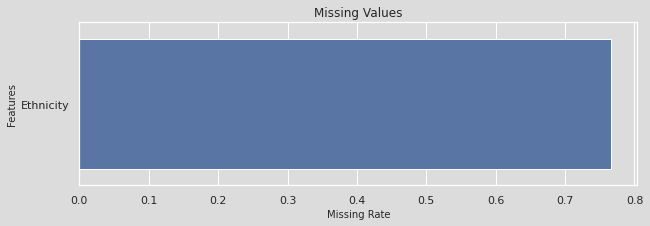

In [36]:
plot_missing(df)

### df.DODRace "TARGET FEATURE"

In [37]:
df.DODRace.value_counts()  #500 ün alrındakiler imodel öğrenemeyeceği için  4,6,5,8 classlarını droplayacağım

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [38]:
df = df[df['DODRace'].isin([1,2,3])]
df['DODRace'].value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [39]:
df["DODRace"] = df.DODRace.map({
                                    1: "White",
                                    2: "Black",
                                    3: "Hispanic"
                                  })

In [41]:
df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [42]:
df.reset_index(drop=True, inplace=True)

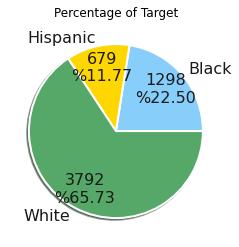

In [43]:
df['DODRace'].value_counts().sort_index().plot.pie(
    shadow=True, figsize=(4,4),
    textprops={'fontsize':16, 'color':'k'},
    wedgeprops = {'linewidth':2, 'edgecolor':'w'},
    colors=['LightSkyBlue', 'gold', 'g', 'm'],
    title='Percentage of Target',
    ylabel= "",
    labeldistance=1.1, pctdistance=0.75, 
    autopct=lambda x: '{:.0f}\n%{:.2f}'.format(len(df['DODRace'])*x/100, x)
       );

In [53]:
df.shape

(5769, 108)

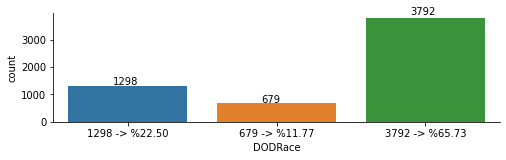

In [55]:
plt.figure(figsize=(8,2))
ax = sns.countplot(df['DODRace'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
   
   labels = [f'{p.get_height()} -> %{100*(p.get_height()/df["DODRace"].count()):0.2f}' if p.get_height() > 0 else '' for p in ax.patches]
   ax.set_xticklabels(labels)
   ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03))
  

### Check the statistical values of features.

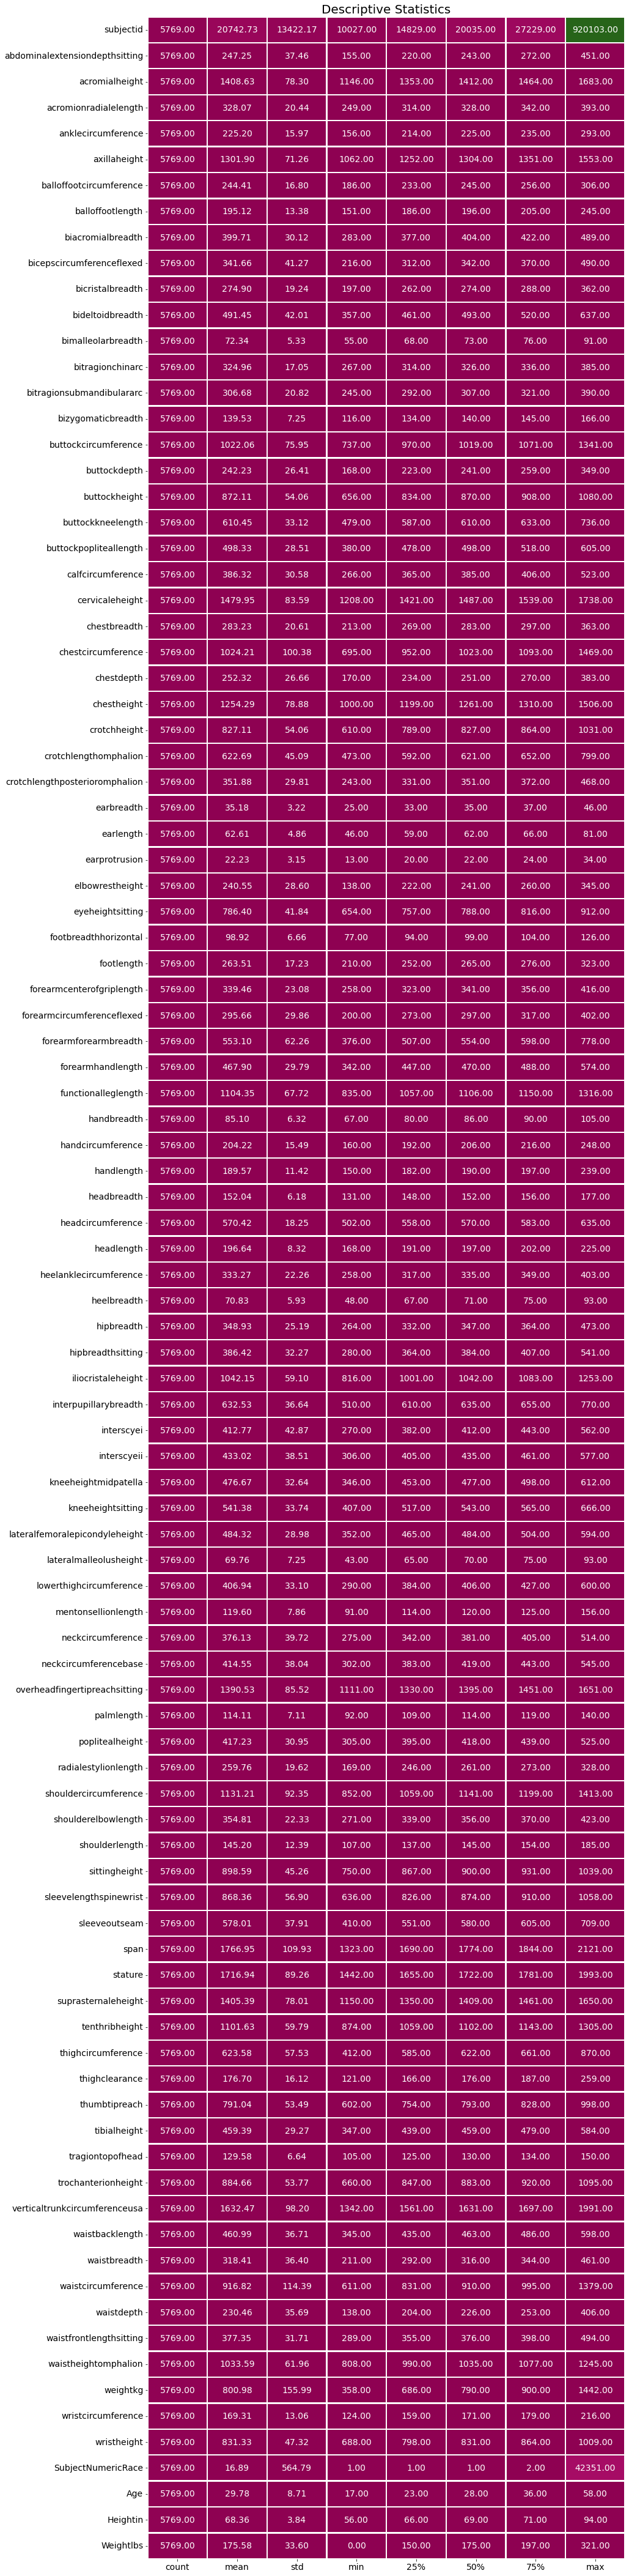

In [56]:
def desc_stats(dataframe, title = None):
    desc = df.describe(include='number').T
    f,ax = plt.subplots(figsize=(14, desc.shape[0]*0.78))
    sns.heatmap(desc,
                annot =True,
                cmap = 'PiYG',
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.35,
                cbar = False,
                annot_kws = {"size": 14})
    plt.xticks(size = 14)
    plt.yticks(size = 14,
               rotation = 0)
    if title == None:
        title = 'Descriptive Statistics'
    plt.title(title, size = 20)
    plt.show()
desc_stats(df)

In [57]:
df.describe().T[df.describe().T['std']>df.describe().T['mean']]  # outlier olabilece kveriler olabilir 

,count,mean,std,min,25%,50%,75%,max
SubjectNumericRace,5769.0000,16.8944,564.7863,1.0000,1.0000,1.0000,2.0000,42351.0000


In [59]:
df.describe(include='O')

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,DODRace,WritingPreference
count,5769,5769,5769,5769,5769,5769,5769,1125,5769,5769
unique,2,253,12,3,3,281,136,157,3,3
top,Male,5-Apr-12,Camp Shelby,Regular Army,Combat Service Support,11B,California,Mexican,White,Right hand
freq,3899,43,1111,2955,3021,641,417,356,3792,5088


In [60]:
df[df['SubjectNumericRace']!=df['DODRace']].shape  #İKİ column da benzerdir. ikisinde de ortak olmayan 806 row var. bunlardan birini droplayıp diğerini target olarak kullanmalıyım

(5769, 108)

In [61]:
df.describe(include='O')    #"Date","PrimaryMOS" columns unique veri sayısı fazla o yüzden droplamaya karar verdim

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,DODRace,WritingPreference
count,5769,5769,5769,5769,5769,5769,5769,1125,5769,5769
unique,2,253,12,3,3,281,136,157,3,3
top,Male,5-Apr-12,Camp Shelby,Regular Army,Combat Service Support,11B,California,Mexican,White,Right hand
freq,3899,43,1111,2955,3021,641,417,356,3792,5088


### Categorical Columns Analysis

In [78]:
# to find how many unique values object features have
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
SubjectsBirthLocation has 136 unique value
DODRace has 3 unique value
WritingPreference has 3 unique value


In [62]:
def cat_analyser(data, col, freq_limit = 100):
    df_ = data.copy()
    sns.set(rc = {'axes.facecolor': 'gainsboro',
                  'figure.facecolor': 'gainsboro'})
    if df_[col].nunique() > freq_limit:
        df_ = df_.loc[df_[col].isin(df_[col].value_counts(). \
                                    keys()[:freq_limit].tolist())]
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
    fig.suptitle(col, fontsize = 16)
    sns.countplot(data = df_,
                  x = col,
                  hue=df["DODRace"],
                  ax = ax[0],
                  palette='PiYG',
                  order =  df_[col].value_counts().index)
    ax[0].set_xlabel('')
    pie_cmap = plt.get_cmap('PiYG')
    normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) 
    data[col].value_counts().plot.pie(autopct = '%1.1f%%',
                                      textprops = {'fontsize': 12},
                                      ax = ax[1],
                                      colors = pie_cmap(normalize(df_[col].value_counts())))
    ax[1].set_ylabel('')
    plt.show()
    matplotlib.rc_file_defaults()
    sns.reset_orig()

In [63]:
cat_cols =df.select_dtypes('O').columns
cat_cols

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'Ethnicity', 'DODRace', 'WritingPreference'],
      dtype='object')

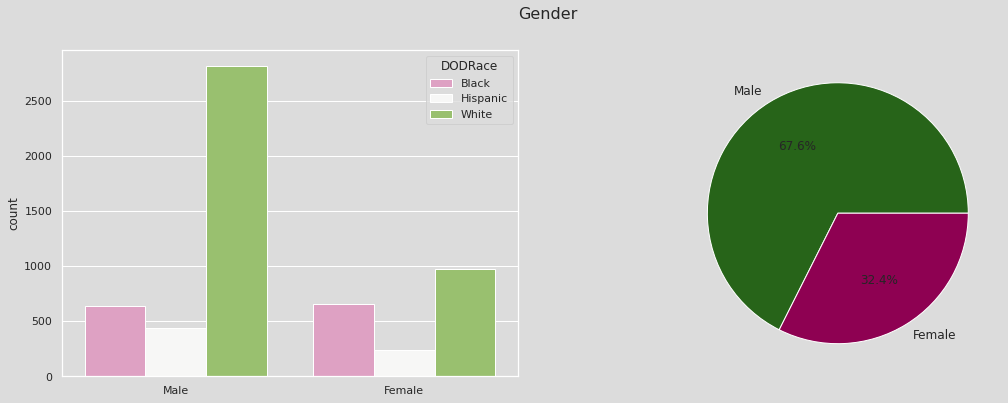

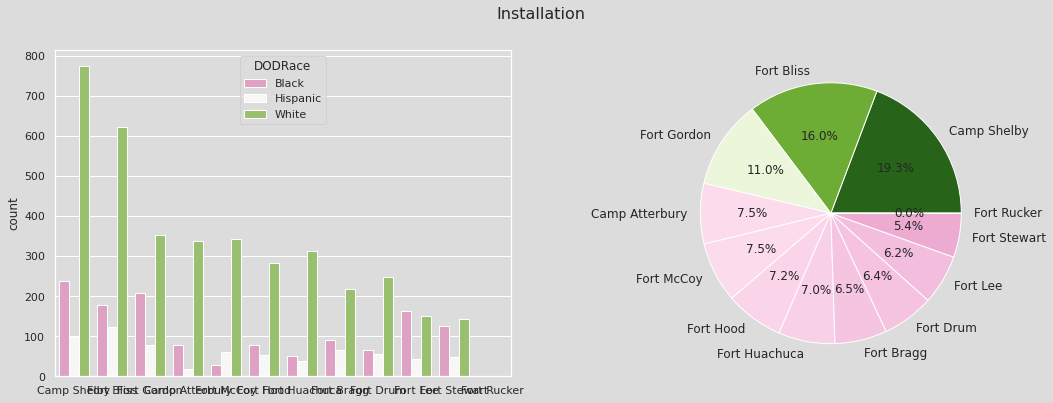

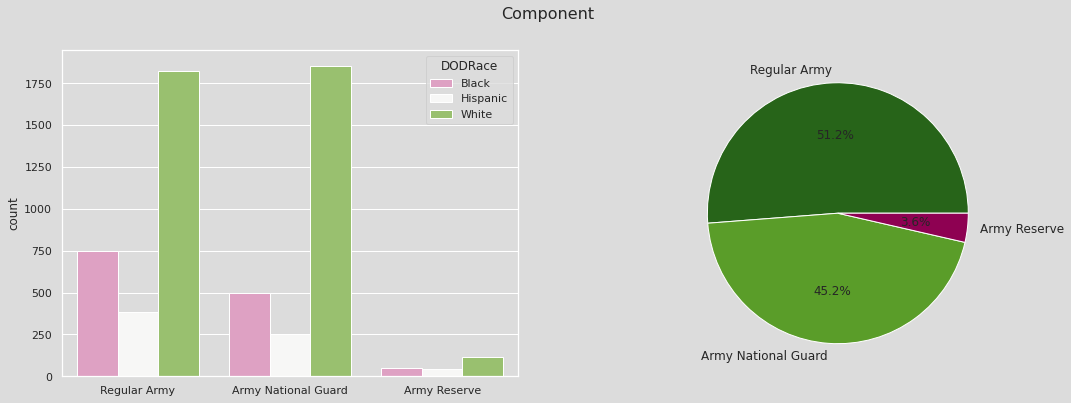

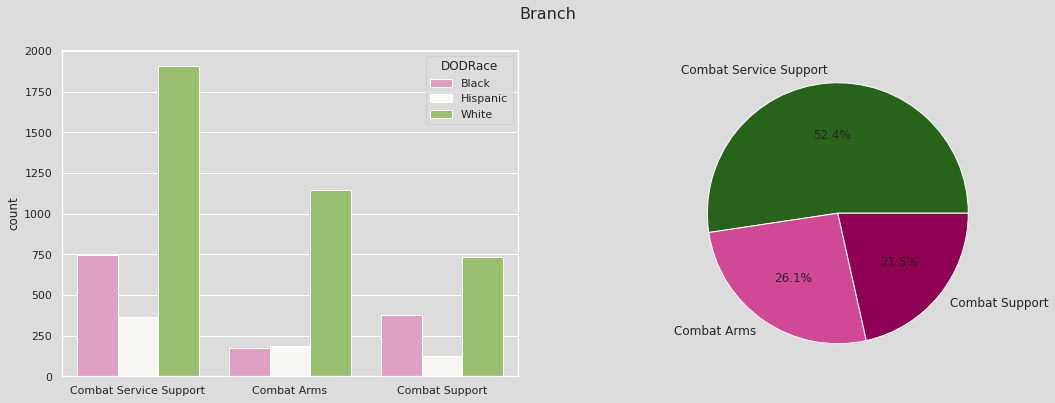

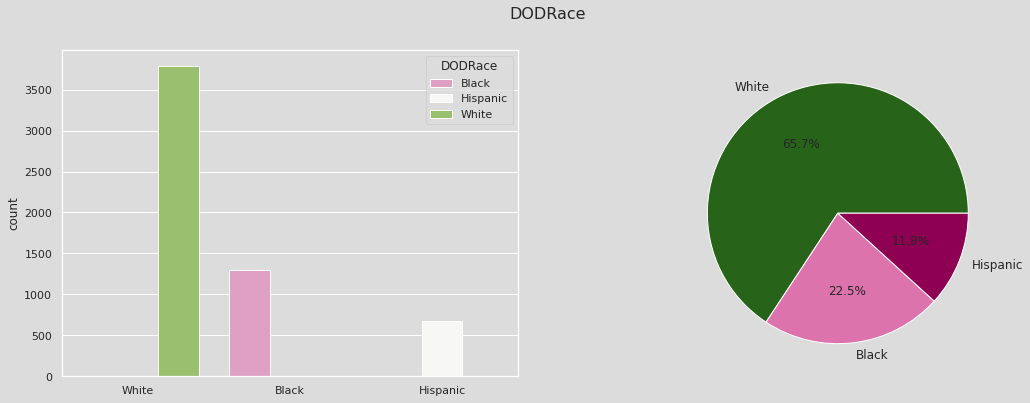

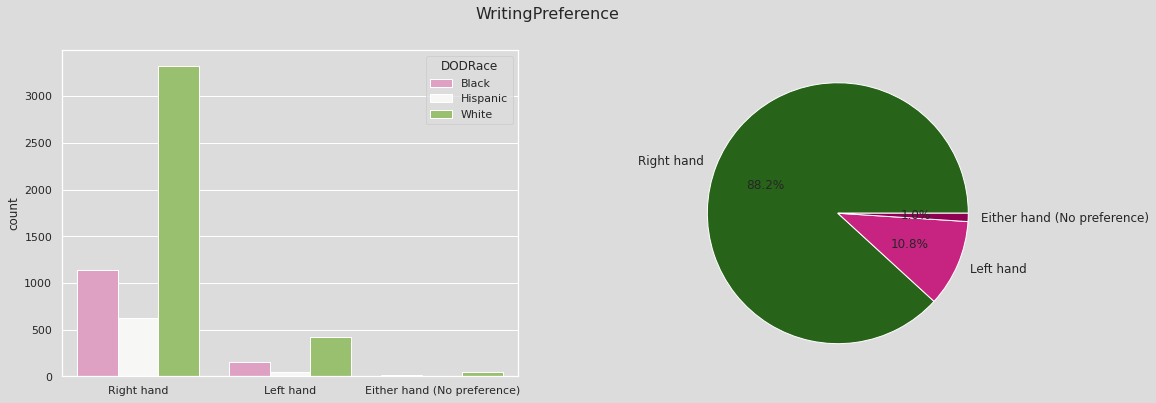

In [64]:
cat_cols =df.select_dtypes('O').columns                             #df[col].nunique()<15 seçtim görsel olarak unique çok fazla olanlar çok karıştı. dodrace ın ayırt edeceği featureları görmek istedim
for col in cat_cols:
    if df[col].nunique()<15:
       cat_analyser(df, col)

In [65]:
from plotly.offline import iplot
import plotly.graph_objs as go

In [66]:
def cat_date_analyser(dataframe, cat_col,col):
    df_ = dataframe[:-1].copy()
    data = list()
    for value in df_[cat_col].unique():
        df_cat = df_.loc[df_[cat_col] == value]
        df_grouped = df_cat.groupby('DODRace').size(). \
        to_frame('count').reset_index().sort_values('DODRace')
        data.append(go.Scatter(x = df_grouped['DODRace'],
                               y = df_grouped['count'],
                               mode = 'lines',
                               name = value,
                               showlegend = True)
                   )
    layout = go.Layout(title = {'text': "Number of Power Outages by Dates",
                                'y':0.9,
                                'x':0.5,
                                'xanchor': 'center',
                                'yanchor': 'top',
                               },
                       legend = dict(x = 0.9,
                                     y = 0.95,
                                     bgcolor = 'rgba(255, 255, 255, 0)',
                                     bordercolor = 'rgba(255, 255, 255, 0)',
                                     title = cat_col),
                       xaxis = dict(title = 'target labels'),
                       yaxis = dict(title = 'Power Outages'),
                       template = 'plotly_white')
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

In [67]:
cat_date_analyser(df,'SubjectsBirthLocation','DODRace')

In [68]:
cat_date_analyser(df,"Installation",'DODRace')

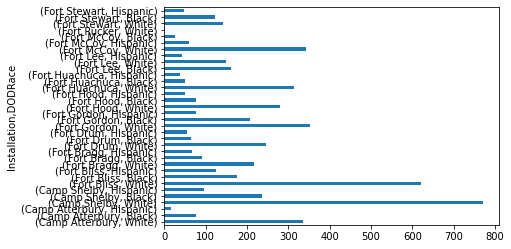

In [213]:
df.groupby(['Installation'])["DODRace"].value_counts().plot(kind="barh")

In [71]:
cat_date_analyser(df,"Component",'DODRace')

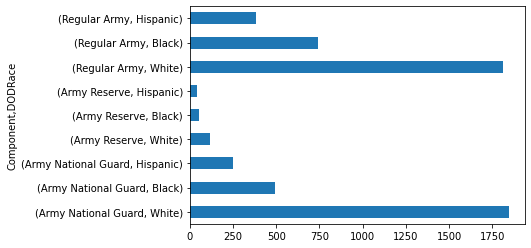

In [211]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh")

In [73]:
cat_date_analyser(df,'Branch','DODRace')

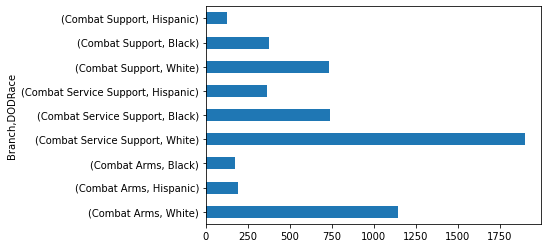

In [212]:
df.groupby(['Branch'])["DODRace"].value_counts().plot(kind="barh")

In [75]:
drop_list1 = ['subjectid','Ethnicity','SubjectNumericRace',
    "Date","PrimaryMOS",
    "Weightlbs", "Heightin"]

In [76]:
df.drop(drop_list1, axis=1, inplace=True)

In [79]:
df.groupby('Gender')['DODRace'].value_counts().sort_index().to_frame().unstack(0)

DODRace      
Gender    Female  Male
DODRace               
Black        656   642
Hispanic     239   440
White        975  2817

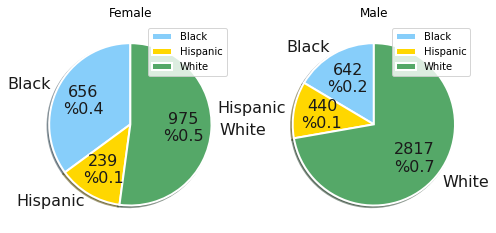

In [80]:
g = df.groupby('Gender')['DODRace'].value_counts(normalize=True).sort_index().to_frame().unstack(0).plot.pie(
    subplots=True, layout=(1,2), 
    startangle=90, legend=True,
    shadow=True, figsize=(8,8),
    textprops={'fontsize':16, 'color':'k'},
    wedgeprops = {'linewidth':2, 'edgecolor':'w'},
    colors=['LightSkyBlue', 'gold', 'g'],
#     explode=[0, 0, 0, 0.1, 0.1, 0.1, 0.1],
    title=["Female","Male"],
    ylabel= "",
    labeldistance=1.1, pctdistance=0.65, 
    autopct=lambda x: '{:.0f}\n%{:.2f}'.format(len(df['DODRace'])*x/100, x)
)

data = df.groupby('Gender')['DODRace'].value_counts().sort_index().to_frame().unstack(0)
data_per = df.groupby('Gender')['DODRace'].value_counts(normalize=True).sort_index().to_frame().unstack(0)
for x, ra in enumerate(g.ravel()):
    index = 0
    for y, te in enumerate(ra.texts):
        if y%2:
            te.set_text(f'{data.iloc[:, x][index].round(1)}\n%{data_per.iloc[:, x][index].round(1)}')
            index+=1

### Outlier Detection

In [81]:
numeric = df.select_dtypes('number').columns
objects = df.select_dtypes('O').columns

numeric.shape, objects.shape, df.shape

((94,), (7,), (5769, 101))

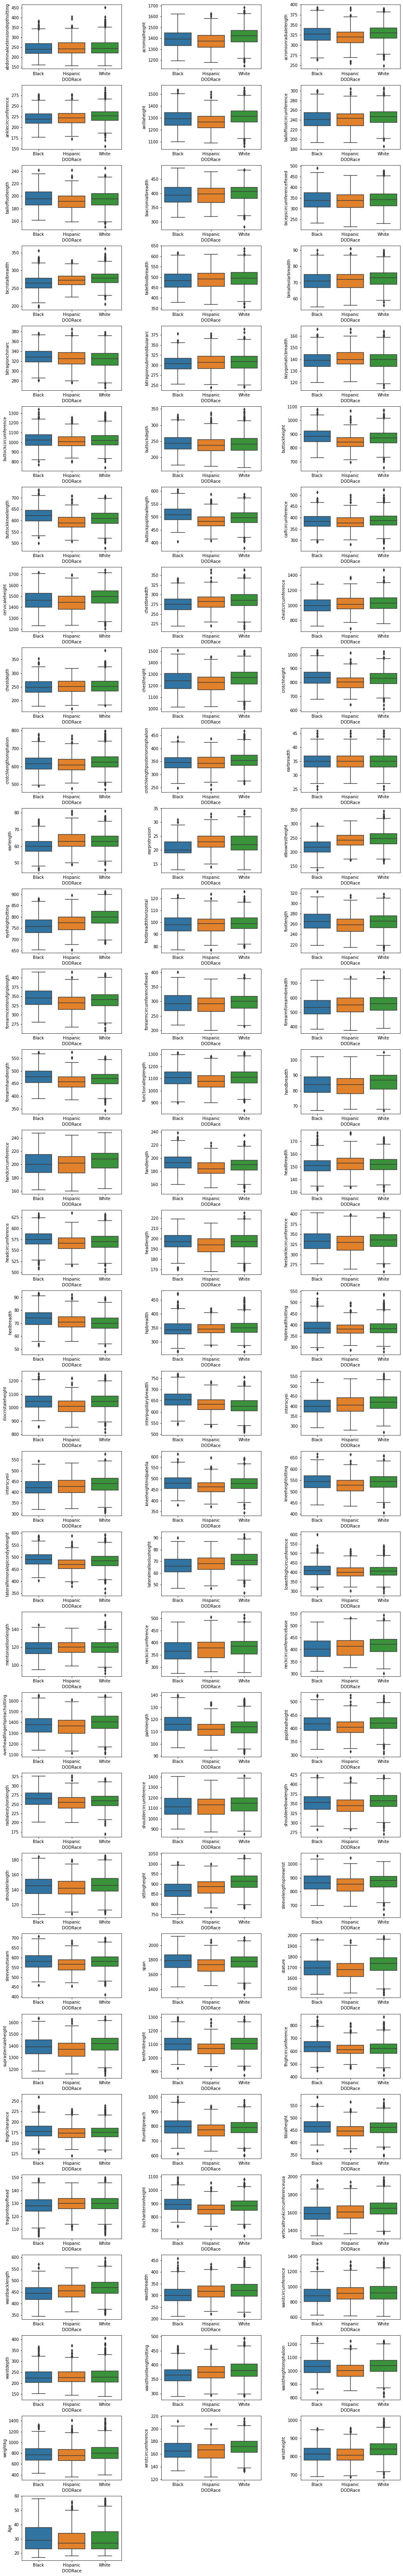

In [82]:
fig = plt.figure(figsize=(16, 48))
plt.subplots_adjust(
                    left=0.1, right=0.9,
                    top=1.9, bottom=0.1, wspace=0.4, hspace=0.25
                    )
for i, col in enumerate(numeric):
     plt.subplot(int(np.ceil(len(numeric)/3)), 3, i+1)
     sns.boxplot(x='DODRace', y=col, data=df, whis=1.5)

In [83]:
def outlier_function(df, col_name,k):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(k*IQR)
    lower_limit = first_quartile-(k*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [84]:
k=2.5
print("\tNumber of Outliers for {}*IQR\n".format(k))
total=0
out_cols = []
for col in df.select_dtypes("number"):
    if outlier_function(df.select_dtypes("number"), col,k)[2] > 0:
        outliers=outlier_function(df.select_dtypes("number"), col, k)[2]
        total+=outliers
        print(
            f"{ outlier_function(df, col,k)[2]:<3}: outlier -> {col}\
            \nlower:{ outlier_function(df, col,k)[0]:<10}, upper:{ outlier_function(df, col,k)[1]:<10}\n")
        out_cols.append(col) if outlier_function(df, col,k)[2] else _
            
print("\n\t{} OUTLIERS TOTALLY".format(total))
print(out_cols)

	Number of Outliers for 2.5*IQR

3  : outlier -> abdominalextensiondepthsitting            
lower:90.0      , upper:402.0     

3  : outlier -> anklecircumference            
lower:161.5     , upper:287.5     

2  : outlier -> bicristalbreadth            
lower:197.0     , upper:353.0     

1  : outlier -> buttockcircumference            
lower:717.5     , upper:1323.5    

2  : outlier -> calfcircumference            
lower:262.5     , upper:508.5     

1  : outlier -> chestcircumference            
lower:599.5     , upper:1445.5    

1  : outlier -> chestdepth            
lower:144.0     , upper:360.0     

1  : outlier -> forearmhandlength            
lower:344.5     , upper:590.5     

2  : outlier -> handlength            
lower:144.5     , upper:234.5     

3  : outlier -> headbreadth            
lower:128.0     , upper:176.0     

7  : outlier -> hipbreadth            
lower:252.0     , upper:444.0     

4  : outlier -> hipbreadthsitting            
lower:256.5     , upper:514.5

In [85]:
k=2.5      #1,5 ıqr için 2636 veri bulduğu için(datanın 3te1) ve 1,5 ıqr üzeinde yığılmalar olduğu için ıqr=2.5 değerini kullandm 50 outlierstan kurtuldum
for i in df.select_dtypes("number"):
    lower,upper,outliers=outlier_function(df.select_dtypes("number"),i,k)
    df=df[(df.select_dtypes("number")[i]>lower)&(df.select_dtypes("number")[i]<upper)]

In [86]:
df.shape

(5734, 101)

### Correlation between numerical features

In [87]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

In [ ]:
check_multicolinarity(df)

In [89]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [90]:
df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(5)

abdominalextensiondepthsitting  abdominalextensiondepthsitting   1.0000
cervicaleheight                 stature                          0.9910
suprasternaleheight             cervicaleheight                  0.9890
                                stature                          0.9890
axillaheight                    acromialheight                   0.9871
dtype: float64

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

## Features and Target variable Split
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [97]:
df.shape

(5734, 101)

In [92]:
X = df.drop(columns=['DODRace'])
y = df['DODRace']

## Train | Test Split
- Split the data into training and testing sets
- get_dummies for X_train and X_test - for data separated by ','
- OneHotEncoder for X_train and X_test

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [103]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4300, 100)
Train target shape   :  (4300,)
Test features shape  :  (1434, 100)
Test target shape    :  (1434,)


### `OneHotEncoder` for X_train and X_test

In [101]:
cat = X.select_dtypes("object").columns
cat 

Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object')

In [102]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

# Parametric Based Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [104]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [105]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [100]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]
log_model = Pipeline(steps=operations)

In [106]:
log_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [107]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set

[[295  15  12]
 [  8 136  25]
 [ 17 124 802]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       322
    Hispanic       0.49      0.80      0.61       169
       White       0.96      0.85      0.90       943

    accuracy                           0.86      1434
   macro avg       0.79      0.86      0.81      1434
weighted avg       0.89      0.86      0.87      1434


Train_Set

[[ 909   30   27]
 [  17  431   58]
 [  58  327 2443]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       966
    Hispanic       0.55      0.85      0.67       506
       White       0.97      0.86      0.91      2828

    accuracy                           0.88      4300
   macro avg       0.81      0.89      0.84      4300
weighted avg       0.91      0.88      0.89      4300



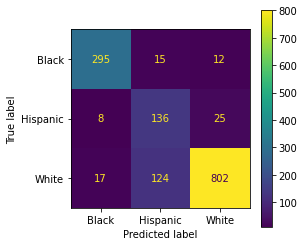

In [108]:
fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(log_model, X_test, y_test, ax=ax);

### Logistic Model Cross Validate

* Use the cross_val_score function to evaluate the model using the train set.

In [114]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer

In [115]:
# pipeline for Cross Validate
operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                        random_state=101))
             ]

model = Pipeline(steps=operations)

In [116]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [113]:
scores = cross_validate(model, 
                        X_train,
                        y_train,
                        scoring = scoring, cv = 10)

df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores

,fit_time,score_time,test_f1_Hispanic,test_precision_Hispanic,test_recall_Hispanic
0,1.5526,0.0511,0.6377,0.5000,0.8800
1,3.1384,0.0429,0.5984,0.4935,0.7600
2,2.5506,0.0157,0.6260,0.5062,0.8200
3,1.4232,0.0158,0.6833,0.5857,0.8200
4,1.3679,0.0164,0.6047,0.5000,0.7647
5,1.5160,0.0159,0.5965,0.5397,0.6667
6,1.3819,0.0161,0.5839,0.4651,0.7843
7,1.4007,0.0159,0.5821,0.4699,0.7647
8,1.3769,0.0163,0.6080,0.5135,0.7451
9,1.4231,0.0161,0.6027,0.4632,0.8627


In [117]:
df_scores.mean()[2:]   #cv sonucunda genel olarak datanın üstteki sonucumu vanillayı doğrulamadığını gördüm

test_f1_Hispanic          0.6123
test_precision_Hispanic   0.5037
test_recall_Hispanic      0.7868
dtype: float64

### Logistic Model GridsearchCV

In [118]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [119]:
C = np.logspace(-1, 2, 3)
# solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {
            "log_model__C": C,
            'log_model__penalty': ["l1", "l2"],
            'log_model__solver': ['liblinear', 'lbfgs'],
            #"log_model__class_weight": ["balanced", None] 
             }

In [120]:
operations = [("OneHotEncoder", column_trans), 
              ("log_model", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=101))
             ]

model =  Pipeline(steps=operations)

In [121]:
log_grid_model = GridSearchCV(
                            model, 
                            param_grid = param_grid,
                            scoring=recall_Hispanic,
                            cv=5,verbose=3, n_jobs=-1
                            ) 

In [122]:
log_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
         

In [124]:
log_grid_model.best_params_

{'log_model__C': 3.1622776601683795,
 'log_model__penalty': 'l2',
 'log_model__solver': 'lbfgs'}

In [125]:
log_grid_model.best_score_

0.7825859056493885

In [126]:
y_pred =log_grid_model.predict(X_test)
y_pred

array(['White', 'White', 'Hispanic', ..., 'White', 'White', 'White'],
      dtype=object)

In [127]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set

[[295  18   9]
 [  8 137  24]
 [ 16 123 804]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       322
    Hispanic       0.49      0.81      0.61       169
       White       0.96      0.85      0.90       943

    accuracy                           0.86      1434
   macro avg       0.79      0.86      0.81      1434
weighted avg       0.90      0.86      0.87      1434


Train_Set

[[ 915   29   22]
 [  15  438   53]
 [  57  327 2444]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94       966
    Hispanic       0.55      0.87      0.67       506
       White       0.97      0.86      0.91      2828

    accuracy                           0.88      4300
   macro avg       0.82      0.89      0.84      4300
weighted avg       0.91      0.88      0.89      4300



In [128]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

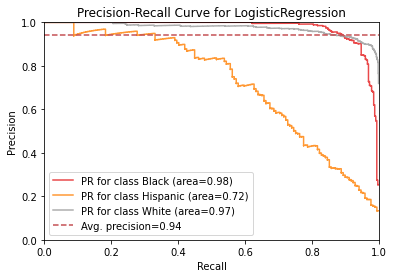

In [129]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [130]:
y_pred = log_grid_model.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

#Distance Based Modelling

## 2. SVC

### Vanilla SVC model 

In [131]:
from sklearn.svm import SVC

In [132]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))] 

# pipeline for SVC regression
svc_model = Pipeline(steps=operations_svc) 

In [133]:
svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [134]:
eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set

[[290  14  18]
 [ 11 132  26]
 [ 17 125 801]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       322
    Hispanic       0.49      0.78      0.60       169
       White       0.95      0.85      0.90       943

    accuracy                           0.85      1434
   macro avg       0.78      0.84      0.80      1434
weighted avg       0.89      0.85      0.86      1434


Train_Set

[[ 903   31   32]
 [  19  437   50]
 [  42  365 2421]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.94       966
    Hispanic       0.52      0.86      0.65       506
       White       0.97      0.86      0.91      2828

    accuracy                           0.87      4300
   macro avg       0.81      0.88      0.83      4300
weighted avg       0.91      0.87      0.88      4300



###  SVC Model GridsearchCV

In [135]:
operations_svc = [
                  ("OneHotEncoder", column_trans),
                  ("svc", SVC(class_weight="balanced",random_state=101))
                 ]

In [136]:
model = Pipeline(steps=operations_svc)

In [137]:
param_grid = {
            'svc__C': [0.1,1,5],
            'svc__gamma': ["scale", "auto", 1],
            'svc__kernel':['rbf', 'poly'],
            'svc__degree':[1, 2],
            }

In [138]:
svc_grid_model = GridSearchCV(
                            model, 
                            param_grid = param_grid, 
                            scoring=recall_Hispanic,
                            cv=3,
                            n_jobs=-1,
                            verbose=3
                            ) 

In [139]:
svc_grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 5], 'svc__degree': [1, 2],
                         'svc__gamma': ['scale', 

In [140]:
svc_grid_model.best_params_

{'svc__C': 1, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}

In [141]:
svc_grid_model.best_score_

0.7785878651263266

In [142]:
eval_metric(svc_grid_model, X_train, y_train, X_test, y_test)

Test_Set

[[293  12  17]
 [ 10 133  26]
 [ 21 134 788]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.91       322
    Hispanic       0.48      0.79      0.59       169
       White       0.95      0.84      0.89       943

    accuracy                           0.85      1434
   macro avg       0.78      0.84      0.80      1434
weighted avg       0.88      0.85      0.86      1434


Train_Set

[[ 899   32   35]
 [  17  441   48]
 [  50  367 2411]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93       966
    Hispanic       0.53      0.87      0.66       506
       White       0.97      0.85      0.91      2828

    accuracy                           0.87      4300
   macro avg       0.81      0.88      0.83      4300
weighted avg       0.91      0.87      0.88      4300



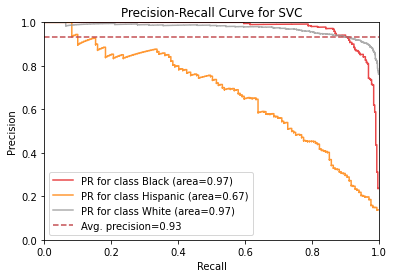

In [143]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("svc", SVC(C=1,
                              degree= 2,
                              gamma="scale",
                              class_weight="balanced",
                              kernel= 'poly',
                              random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [144]:
y_pred =svc_grid_model.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

#Decision Tree Based Modelling
Fit the model with train dataset

Get predict from vanilla model on both train and test sets to examine if there is over/underfitting

Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.

Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 3. Random Forest

In [145]:
cat = X.select_dtypes("object").columns
cat

Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object')

In [146]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [147]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4300, 100)
Train target shape   :  (4300,)
Test features shape  :  (1434, 100)
Test target shape    :  (1434,)


### Vanilla RF Model

In [156]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                     random_state=101))]

In [157]:
rf_model = Pipeline(steps=operations_rf)

In [158]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [186]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set

[[208   0 114]
 [ 14   6 149]
 [ 12   1 930]]
              precision    recall  f1-score   support

       Black       0.89      0.65      0.75       322
    Hispanic       0.86      0.04      0.07       169
       White       0.78      0.99      0.87       943

    accuracy                           0.80      1434
   macro avg       0.84      0.56      0.56      1434
weighted avg       0.81      0.80      0.75      1434


Train_Set

[[ 966    0    0]
 [   0  506    0]
 [   0    0 2828]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       966
    Hispanic       1.00      1.00      1.00       506
       White       1.00      1.00      1.00      2828

    accuracy                           1.00      4300
   macro avg       1.00      1.00      1.00      4300
weighted avg       1.00      1.00      1.00      4300



### RF Model Cross Validate

In [185]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]
model = Pipeline(steps=operations_rf)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring =scoring, 
                        cv = 5)

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.0419
test_precision_Hispanic   0.6100
test_recall_Hispanic      0.0218
dtype: float64

### RF Model GridsearchCV

In [175]:
param_grid = {'RF_model__n_estimators':[100,200],
             'RF_model__max_depth':[5,3],
             'RF_model__min_samples_split':[20,30]# 'max_features': ['auto', None, 15, 20]
             }

In [176]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)


In [177]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [5, 3],
                      

In [178]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        min_samples_split=20, n_estimators=200,
                                        random_state=101))])

In [179]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3,
 'RF_model__min_samples_split': 20,
 'RF_model__n_estimators': 200}

In [180]:
rf_grid_model.best_score_

0.6206173558532325

In [181]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set

[[231  55  36]
 [ 23 111  35]
 [ 98 342 503]]
              precision    recall  f1-score   support

       Black       0.66      0.72      0.69       322
    Hispanic       0.22      0.66      0.33       169
       White       0.88      0.53      0.66       943

    accuracy                           0.59      1434
   macro avg       0.58      0.64      0.56      1434
weighted avg       0.75      0.59      0.63      1434


Train_Set

[[ 753  138   75]
 [  43  348  115]
 [ 239 1120 1469]]
              precision    recall  f1-score   support

       Black       0.73      0.78      0.75       966
    Hispanic       0.22      0.69      0.33       506
       White       0.89      0.52      0.65      2828

    accuracy                           0.60      4300
   macro avg       0.61      0.66      0.58      4300
weighted avg       0.77      0.60      0.64      4300



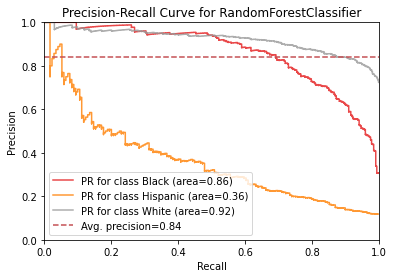

In [182]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model",RandomForestClassifier(class_weight="balanced",
                                                   min_samples_split=20,
                                                   random_state=101,
                                                   max_depth=5,
                                                   n_estimators = 100))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [187]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [169]:
import xgboost as xgb

xgb.__version__

'0.90'

In [188]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=101))]

xgb_model = Pipeline(steps=operations_xgb)

xgb_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [189]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.5068364 , 1.48378192, 1.48378192, ..., 0.5068364 , 0.5068364 ,
       1.48378192])

In [190]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0     
Black     1.4838     966
Hispanic  2.8327     506
White     0.5068    2828
Name: 0, dtype: int64

In [191]:
xgb_model.fit(X_train,y_train,XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [196]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set

[[274  21  27]
 [ 17 113  39]
 [ 41 126 776]]
              precision    recall  f1-score   support

       Black       0.83      0.85      0.84       322
    Hispanic       0.43      0.67      0.53       169
       White       0.92      0.82      0.87       943

    accuracy                           0.81      1434
   macro avg       0.73      0.78      0.74      1434
weighted avg       0.84      0.81      0.82      1434


Train_Set

[[ 905   26   35]
 [  10  441   55]
 [  90  319 2419]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92       966
    Hispanic       0.56      0.87      0.68       506
       White       0.96      0.86      0.91      2828

    accuracy                           0.88      4300
   macro avg       0.81      0.89      0.84      4300
weighted avg       0.90      0.88      0.88      4300



###XGB Model Cross Validate

In [197]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring = scoring, cv = 5,
                        fit_params={"XGB_model__sample_weight":classes_weights})

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.4942
test_precision_Hispanic   0.4161
test_recall_Hispanic      0.6087
dtype: float64

### XGBoost Model GridsearchCV

In [199]:
param_grid = {"XGB_model__n_estimators":[200, 100],
              'XGB_model__max_depth':[3,2],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [200]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)
xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train,XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [201]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 1}

In [202]:
xgb_grid_model.best_score_

0.6422442244224422

In [203]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set

[[268  28  26]
 [ 20 114  35]
 [ 59 148 736]]
              precision    recall  f1-score   support

       Black       0.77      0.83      0.80       322
    Hispanic       0.39      0.67      0.50       169
       White       0.92      0.78      0.85       943

    accuracy                           0.78      1434
   macro avg       0.70      0.76      0.71      1434
weighted avg       0.83      0.78      0.79      1434


Train_Set

[[ 873   48   45]
 [  27  397   82]
 [ 133  412 2283]]
              precision    recall  f1-score   support

       Black       0.85      0.90      0.87       966
    Hispanic       0.46      0.78      0.58       506
       White       0.95      0.81      0.87      2828

    accuracy                           0.83      4300
   macro avg       0.75      0.83      0.78      4300
weighted avg       0.87      0.83      0.84      4300



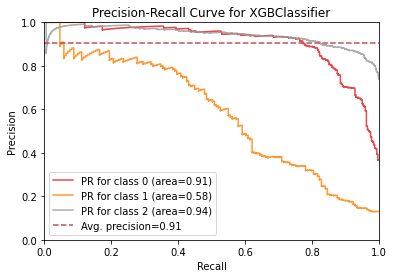

In [204]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                 ("XGB_model", XGBClassifier(subsample=0.8,
                                             learning_rate=0.1,
                                            n_estimators= 100,
                                            max_depth=2,
                                            random_state=101))]
model = Pipeline(steps=operations_xgb)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [205]:
model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

In [206]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.5475581418818982

In [207]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# Comparing Models

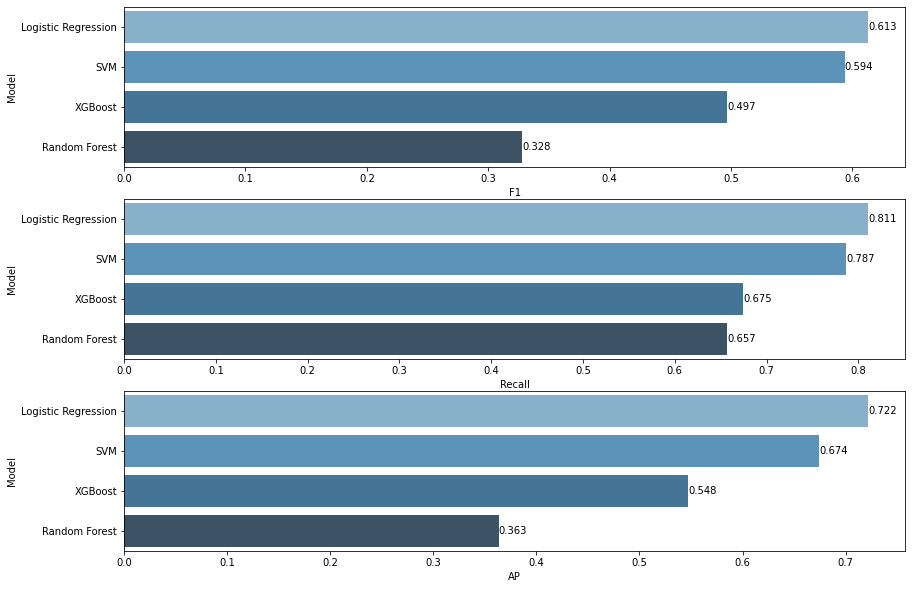

In [208]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [214]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

final_model = Pipeline(steps=operations_final)

In [225]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

---
---

In [215]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000,5734.0000
mean,246.8573,1408.3436,328.0005,225.0909,1301.6946,244.3150,195.0649,399.5856,341.3697,274.7431,491.1664,72.3094,324.8678,306.5677,139.4904,1021.2607,241.9665,871.9363,610.2335,498.2166,386.0085,1479.6692,283.1052,1023.4433,252.1010,1254.0527,826.9597,622.4498,351.7886,35.1693,62.5957,22.2231,240.4810,786.2911,98.8758,263.4404,339.3601,295.4840,552.6721,467.7797,1104.0553,85.0701,204.1498,189.5133,152.0202,570.3511,196.6256,333.1442,70.8130,348.6678,386.0842,1041.9854,632.4205,412.5651,432.8486,476.5514,541.2297,484.2154,69.7300,406.5717,119.5785,375.9304,414.3825,1390.2131,114.0712,417.1962,259.7032,1130.6784,354.7407,145.1669,898.4691,868.1203,577.9069,1766.5274,1716.6486,1405.1043,1101.4088,623.0066,176.5582,790.7705,459.2782,129.5748,884.4819,1631.6894,460.7463,318.0804,915.6597,230.0678,377.1913,1033.5296,799.3418,169.2297,831.1306,29.7586
std,36.8741,77.9475,20.3417,15.8040,70.9668,16.6706,13.3043,30.0022,40.9833,19.0018,41.6999,5.2977,16.9646,20.7303,7.2083,74.6269,26.0363,53.7688,32.8185,28.3351,30.1502,83.2445,20.4922,99.4799,26.3805,78.5795,53.7704,44.8837,29.7824,3.2156,4.8489,3.1378,28.5477,41.7290,6.6026,17.1384,22.9832,29.6904,61.8043,29.6229,67.3899,6.2926,15.4284,11.3522,6.1332,18.1803,8.3103,22.0903,5.8978,24.7117,31.7096,58.8324,36.5124,42.7298,38.3517,32.4678,33.5276,28.8074,7.2168,32.5354,7.8304,39.5625,37.8756,85.2081,7.0711,30.8046,19.5426,91.8781,22.24

In [221]:
max_human = X.describe(include="all").loc["max"]
max_human


abdominalextensiondepthsitting    392.0000
acromialheight                   1683.0000
acromionradialelength             393.0000
anklecircumference                283.0000
axillaheight                     1553.0000
balloffootcircumference           306.0000
balloffootlength                  245.0000
biacromialbreadth                 484.0000
bicepscircumferenceflexed         490.0000
bicristalbreadth                  347.0000
bideltoidbreadth                  626.0000
bimalleolarbreadth                 91.0000
bitragionchinarc                  378.0000
bitragionsubmandibulararc         381.0000
bizygomaticbreadth                166.0000
buttockcircumference             1305.0000
buttockdepth                      343.0000
buttockheight                    1074.0000
buttockkneelength                 730.0000
buttockpopliteallength            605.0000
calfcircumference                 500.0000
cervicaleheight                  1738.0000
chestbreadth                      356.0000
chestcircum

In [220]:
cat_cols =X.select_dtypes('O').columns
cat_cols

Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object')

In [229]:
max_human["Gender"] = "Female"
max_human["SubjectsBirthLocation"] = "California"
max_human["WritingPreference"] = "Leftt hand"
max_human['Installation'] = "Fort Lee"
max_human['Component'] = "Army Reserve"
max_human['Branch'] = "Combat Service Support"

In [230]:
pd.DataFrame(max_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Installation,Component,Branch,SubjectsBirthLocation,Age,WritingPreference
max,392.0000,1683.0000,393.0000,283.0000,1553.0000,306.0000,245.0000,484.0000,490.0000,347.0000,626.0000,91.0000,378.0000,381.0000,166.0000,1305.0000,343.0000,1074.0000,730.0000,605.0000,500.0000,1738.0000,356.0000,1374.0000,353.0000,1506.0000,1031.0000,799.0000,468.0000,46.0000,81.0000,33.0000,345.0000,912.0000,124.0000,318.0000,416.0000,402.0000,743.0000,574.0000,1316.0000,103.0000,247.0000,232.0000,175.0000,635.0000,225.0000,403.0000,93.0000,442.0000,505.0000,1253.0000,765.0000,553.0000,551.0000,596.0000,664.0000,594.0000,90.0000,533.0000,148.0000,514.0000,545.0000,1651.0000,140.0000,525.0000,328.0000,1405.0000,423.0000,185.0000,1039.0000,1043.0000,709.0000,2111.0000,1993.0000,1650.0000,1305.0000,840.0000,238.0000,998.0000,574.0000,150.0000,1083.0000,1966.0000,598.0000,459.0000,1356.0000,367.0000,494.0000,1242.0000,1375.0000,212.0000,1009.0000,Female,Fort Lee,Army Reserve,Combat Service Support,California,58.0000,Leftt hand


In [231]:
final_model.predict(pd.DataFrame(max_human).T)

array(['Black'], dtype=object)

In [232]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7866917350665988

In [233]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7782787857867144

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement (Synthetic Minority Oversampling Technique)

In [234]:
#!pip install imblearn

In [255]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [256]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [257]:
X_train_ohe = column_trans.fit_transform(X_train)

In [258]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train_ohe, y_train)

In [259]:
X_over.shape

(8484, 242)

In [260]:
y_over.value_counts()

White       2828
Black       2828
Hispanic    2828
Name: DODRace, dtype: int64

In [261]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_ohe, y_train)

In [262]:
X_under.shape

(1518, 242)

In [263]:
y_under.value_counts()

Black       506
Hispanic    506
White       506
Name: DODRace, dtype: int64

In [264]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [273]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [274]:
y_train.value_counts()

White       2828
Black        966
Hispanic     506
Name: DODRace, dtype: int64

In [267]:
y_resampled_over.value_counts()

White       2828
Hispanic    1000
Black        966
Name: DODRace, dtype: int64

In [275]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train) #X_resampled_over, y_resampled_over

In [269]:
y_resampled_under.value_counts()

White       2500
Black        966
Hispanic     506
Name: DODRace, dtype: int64

In [270]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [271]:
y_resampled.value_counts()

White       2500
Hispanic    1000
Black        966
Name: DODRace, dtype: int64

In [272]:
y_train.value_counts()

White       2828
Black        966
Hispanic     506
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

What does the smote pipeline do?

smote_pipeline.fit(X_train, y_train) 

--> column_trans.fit_transform(X_train) #(Onehooencoder and minmaxscaler)

--> over.fit_resample(X_train_transform) 
                                     
--> under.fit_resample(X_train_transform_over)

--> log_model.fit(X_train_transform_over_under, y_train)


for predict, over and under sumpling algortims do nothing for X_test.

smote_pipeline.predict(X_test)

--> column_trans.transform(X_test) #(Onehooencoder and minmaxscaler) 

--> log_model.predict(X_test_transform)

In [279]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [280]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))] #("scaler", MinMaxScaler())

In [281]:
smote_pipeline = imbpipeline(steps=operations)

In [282]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [283]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set

[[289  16  17]
 [  9 122  38]
 [  6  54 883]]
              precision    recall  f1-score   support

       Black       0.95      0.90      0.92       322
    Hispanic       0.64      0.72      0.68       169
       White       0.94      0.94      0.94       943

    accuracy                           0.90      1434
   macro avg       0.84      0.85      0.85      1434
weighted avg       0.91      0.90      0.90      1434


Train_Set

[[ 884   25   57]
 [  15  371  120]
 [  24  129 2675]]
              precision    recall  f1-score   support

       Black       0.96      0.92      0.94       966
    Hispanic       0.71      0.73      0.72       506
       White       0.94      0.95      0.94      2828

    accuracy                           0.91      4300
   macro avg       0.87      0.86      0.87      4300
weighted avg       0.92      0.91      0.91      4300



In [284]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.6524
test_precision_Hispanic   0.6498
test_recall_Hispanic      0.6580
dtype: float64

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [294]:
#!pip install shap

In [295]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

model_shap.fit(X_train_trans, y_train)

# shap değerleri tüm featurelar için çıkıyor ama bu data için sagada çıkmadı

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [296]:
X_train_trans

array([[0.        , 1.        , 0.        , ..., 0.5443038 , 0.55921053,
        0.48780488],
       [1.        , 0.        , 0.        , ..., 0.27848101, 0.29605263,
        0.46341463],
       [0.        , 1.        , 0.        , ..., 0.5443038 , 0.41118421,
        0.46341463],
       ...,
       [1.        , 0.        , 0.        , ..., 0.30379747, 0.51973684,
        0.09756098],
       [0.        , 1.        , 0.        , ..., 0.58227848, 0.52631579,
        0.3902439 ],
       [1.        , 0.        , 0.        , ..., 0.15189873, 0.37171053,
        0.6097561 ]])

In [297]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set

[[295  17  10]
 [  9 135  25]
 [ 22 119 802]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       322
    Hispanic       0.50      0.80      0.61       169
       White       0.96      0.85      0.90       943

    accuracy                           0.86      1434
   macro avg       0.79      0.86      0.81      1434
weighted avg       0.89      0.86      0.87      1434


Train_Set

[[ 909   32   25]
 [  13  437   56]
 [  61  325 2442]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       966
    Hispanic       0.55      0.86      0.67       506
       White       0.97      0.86      0.91      2828

    accuracy                           0.88      4300
   macro avg       0.81      0.89      0.84      4300
weighted avg       0.91      0.88      0.89      4300



In [298]:
model = LogisticRegression(class_weight='balanced',
                           max_iter=10000,
                           random_state=101,
                           penalty="l1", 
                           solver='saga')

scores = cross_validate(model,
                        X_train_trans,
                        y_train, 
                        scoring = scoring, 
                        cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.6125
test_precision_Hispanic   0.5053
test_recall_Hispanic      0.7806
dtype: float64

In [299]:
X_train.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [300]:
features = column_trans_shap.get_feature_names_out(X_train.columns)
features

array(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__Installation_Camp Atterbury',
       'onehotencoder__Installation_Camp Shelby',
       'onehotencoder__Installation_Fort Bliss',
       'onehotencoder__Installation_Fort Bragg',
       'onehotencoder__Installation_Fort Drum',
       'onehotencoder__Installation_Fort Gordon',
       'onehotencoder__Installation_Fort Hood',
       'onehotencoder__Installation_Fort Huachuca',
       'onehotencoder__Installation_Fort Lee',
       'onehotencoder__Installation_Fort McCoy',
       'onehotencoder__Installation_Fort Rucker',
       'onehotencoder__Installation_Fort Stewart',
       'onehotencoder__Component_Army National Guard',
       'onehotencoder__Component_Army Reserve',
       'onehotencoder__Component_Regular Army',
       'onehotencoder__Branch_Combat Arms',
       'onehotencoder__Branch_Combat Service Support',
       'onehotencoder__Branch_Combat Support',
       'onehotencoder__SubjectsBirthLo

## Shap values for all data

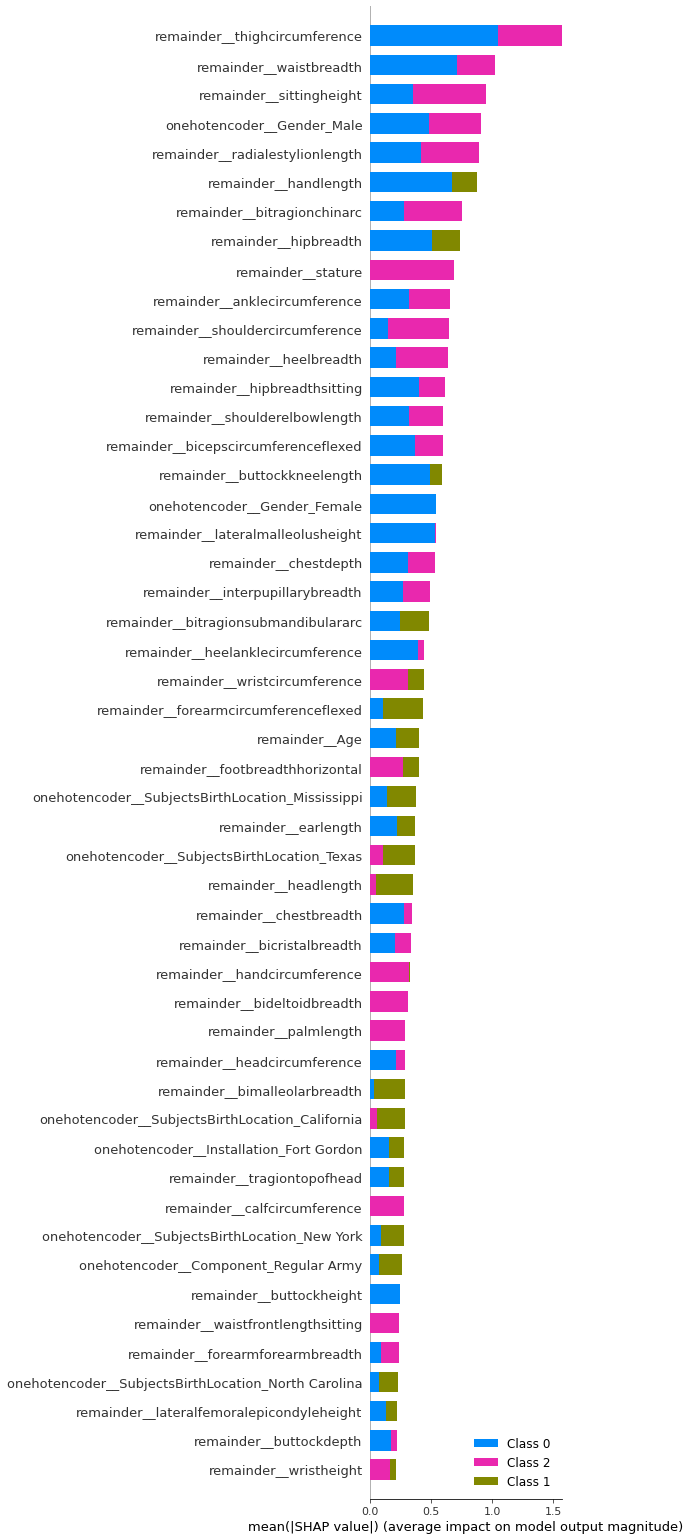

In [304]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans) #LinearExplainer knn svm

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values, X_test_trans, max_display=50,feature_names = features, plot_type="bar")

## SHAP for Feature Selection

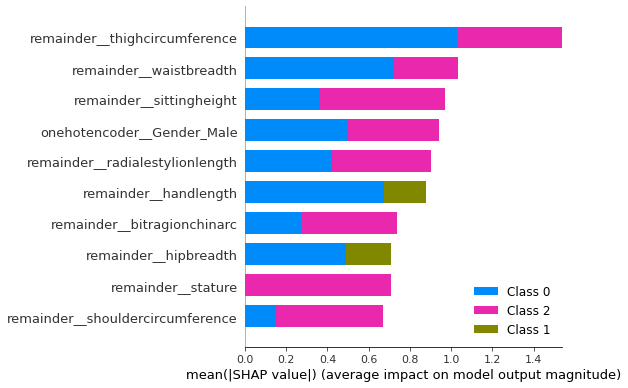

In [305]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, X_train_trans, max_display=10,feature_names = features)

In [316]:
hispanic = ['Gender', 'Installation', 'Component', 'Branch',"SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [323]:
X2 = X[hispanic]
X2.head(2)

,Gender,Installation,Component,Branch,SubjectsBirthLocation,handlength,forearmcircumferenceflexed,headlength,bitragionsubmandibulararc,footbreadthhorizontal,bimalleolarbreadth,poplitealheight,waistdepth,WritingPreference,tragiontopofhead,bideltoidbreadth,neckcircumferencebase,biacromialbreadth,buttockheight,buttockkneelength,earlength,axillaheight,Age
0,Female,Fort Hood,Regular Army,Combat Support,Germany,184,265,191,301,91,65,362,217,Right hand,110,466,368,373,836,587,65,1180,26
1,Female,Fort Hood,Regular Army,Combat Service Support,California,189,247,180,270,91,64,426,168,Right hand,125,430,345,372,900,583,60,1292,21


In [318]:
X2 = X[hispanic]
y = data.DODRace

In [315]:
cat

Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object')

In [319]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object')

In [320]:
X2.shape

(5734, 23)

In [326]:
y = df.DODRace
y

0          Black
1       Hispanic
2          White
3          Black
5          Black
          ...   
5764       White
5765       White
5766       White
5767       White
5768       White
Name: DODRace, Length: 5734, dtype: object

In [327]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [328]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), 
                                       remainder=MinMaxScaler())

operations_shap = [("OneHotEncoder",column_trans_shap),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                            random_state=101, penalty="l1", solver='saga'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Installation', 'Component', 'Branch',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [329]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set

[[223   9  26]
 [ 10 103  22]
 [ 91 133 530]]
              precision    recall  f1-score   support

       Black       0.69      0.86      0.77       258
    Hispanic       0.42      0.76      0.54       135
       White       0.92      0.70      0.80       754

    accuracy                           0.75      1147
   macro avg       0.68      0.78      0.70      1147
weighted avg       0.81      0.75      0.76      1147


Train_Set

[[ 874   51  105]
 [  29  440   71]
 [ 348  474 2195]]
              precision    recall  f1-score   support

       Black       0.70      0.85      0.77      1030
    Hispanic       0.46      0.81      0.58       540
       White       0.93      0.73      0.81      3017

    accuracy                           0.76      4587
   macro avg       0.69      0.80      0.72      4587
weighted avg       0.82      0.76      0.78      4587



In [330]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.5572
test_precision_Hispanic   0.4370
test_recall_Hispanic      0.7722
dtype: float64

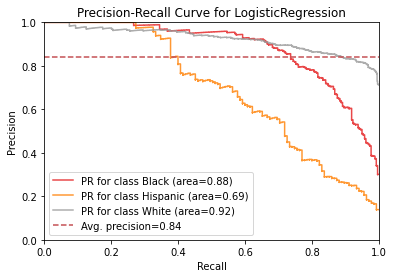

In [331]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations_shap)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [339]:
#pip install scikit-plot

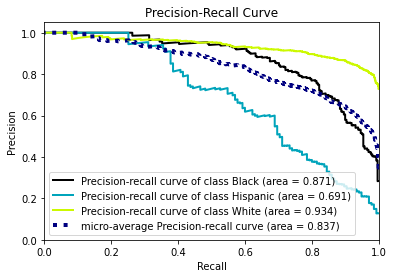

In [338]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___